In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv('/Users/lana-n/datacsv/hrtrain.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [3]:
test = pd.read_csv('/Users/lana-n/datacsv/hrtest.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [4]:
train.is_promoted.unique()

array([0, 1])

In [46]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [5]:
#train.shape
#test.shape

In [6]:
#train.isnull().sum()

In [7]:
#test.isnull().sum()

In [8]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [9]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Testing Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Testing Data : 0


In [10]:
#test.isnull().sum()
#train.isnull().sum()

In [11]:
train.department.unique()   #9 unique values

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [12]:
train['department'] = train['department'].map({'Sales & Marketing': 9, 'Operations': 8,'Technology': 7,'Analytics': 6,'R&D': 5,'Procurement': 4,'Finance': 3,'HR': 2,'Legal': 0})
test['department'] = test['department'].map({'Sales & Marketing': 9,'Operations': 8,'Technology': 7,'Analytics': 6,'R&D': 5,'Procurement': 4,'Finance': 3,'HR': 2, 'Legal': 0})

In [13]:
train.region.unique()   #34 unique values

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [14]:
train['region'] = train['region'].map({'region_34': 34, 'region_33': 33, 'region_32': 32, 'region_31': 31,'region_30': 30,'region_29': 29,'region_28': 28,'region_27': 27,'region_26': 26,'region_25': 25,'region_24': 24,'region_23': 23,
                                       'region_22': 22,'region_21': 21,'region_20': 20,'region_19': 19,'region_18': 18,'region_17': 17,'region_16': 16,'region_15': 15, 'region_14': 14,'region_13': 13,'region_12': 12,'region_11': 11,
                                      'region_10': 10,'region_9': 9,'region_8': 8,'region_7': 7, 'region_6': 6,'region_5': 5,'region_4': 4,'region_3': 3,'region_2': 3,'region_1': 1})
test['region'] = test['region'].map({'region_34': 34, 'region_33': 33, 'region_32': 32, 'region_31': 31,'region_30': 30,'region_29': 29,'region_28': 28,'region_27': 27,'region_26': 26,'region_25': 25,'region_24': 24,'region_23': 23,
                                       'region_22': 22,'region_21': 21,'region_20': 20,'region_19': 19,'region_18': 18,'region_17': 17,'region_16': 16,'region_15': 15, 'region_14': 14,'region_13': 13,'region_12': 12,'region_11': 11,
                                      'region_10': 10,'region_9': 9,'region_8': 8,'region_7': 7, 'region_6': 6,'region_5': 5,'region_4': 4,'region_3': 3,'region_2': 3,'region_1': 1})

In [15]:
train.education.unique()   #3 unique values

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [16]:
train.recruitment_channel.unique()   #3 unique values

array(['sourcing', 'other', 'referred'], dtype=object)

In [17]:
train['gender'] = train['gender'].map({'m': 1, 'f': 0})
test['gender'] = test['gender'].map({'m': 1, 'f': 0})

In [18]:
train['recruitment_channel'] = train['recruitment_channel'].map({'sourcing': 2, 'referred': 1, 'other': 0})
test['recruitment_channel'] = test['recruitment_channel'].map({'sourcing': 2, 'referred': 1, 'other': 0})

In [19]:
train['education'] = train['education'].map({"Master's & above": 2, "Bachelor's": 1, 'Below Secondary': 0})
test['education'] = test['education'].map({"Master's & above": 2, "Bachelor's": 1, 'Below Secondary': 0})

In [20]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,9,7,2,0,2,1,35,5.0,8,0,49,0
1,65141,8,22,1,1,0,1,30,5.0,4,0,60,0
2,7513,9,19,1,1,2,1,34,3.0,7,0,50,0
3,2542,9,23,1,1,0,2,39,1.0,10,0,50,0
4,48945,7,26,1,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,7,14,1,1,2,1,48,3.0,17,0,78,0
54804,74592,8,27,2,0,0,1,37,2.0,6,0,56,0
54805,13918,6,1,1,1,0,1,27,5.0,3,0,79,0
54806,13614,9,9,1,1,2,1,29,1.0,2,0,45,0


In [21]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,7,26,1,1,2,1,24,3.0,1,0,77
1,74430,2,4,1,0,0,1,31,3.0,5,0,51
2,72255,9,13,1,1,0,1,31,1.0,4,0,47
3,38562,4,3,1,0,0,3,31,2.0,9,0,65
4,64486,3,29,1,1,2,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0,3,0,1,2,1,24,3.0,1,0,61
23486,25600,7,25,1,1,2,1,31,3.0,7,0,74
23487,45409,2,16,1,0,2,1,26,4.0,4,0,50
23488,1186,4,31,1,1,2,3,27,3.0,1,0,70


In [22]:
train.shape

(54808, 13)

In [23]:
x = train.iloc[:,1:12].values  #(we took all except on emplayee_id - column 0, and except of the last column - is_promoted)
y = train.iloc[:,12].values

In [24]:
x

array([[ 9.,  7.,  2., ...,  8.,  0., 49.],
       [ 8., 22.,  1., ...,  4.,  0., 60.],
       [ 9., 19.,  1., ...,  7.,  0., 50.],
       ...,
       [ 6.,  1.,  1., ...,  3.,  0., 79.],
       [ 9.,  9.,  1., ...,  2.,  0., 45.],
       [ 2., 22.,  1., ...,  5.,  0., 49.]])

In [25]:
x.shape   #11 features

(54808, 11)

In [26]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y.shape

(54808,)

In [28]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3)

In [29]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((38365, 11), (16443, 11), (38365,), (16443,))

In [30]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [32]:
# Initialize the model
model=Sequential()

# Build input layer 
model.add(Dense(units=88, activation='relu', input_dim=11))

In [33]:
# Building hidden layer
model.add(Dense(units=44,activation ='relu'))

In [34]:
# Building hidden layer
#model.add(Dense(units=22,activation ='relu'))

In [35]:
# Building hidden layer
#model.add(Dense(units=11,activation ='relu'))

In [36]:
#Adding outer layer
model.add(Dense(units=1, activation='sigmoid'))

In [37]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [38]:
#model.fit(x_train, y_train, epochs=50, batch_size=1,verbose=1)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=10)

#train model:   
history = model.fit(x_train, y_train,
 epochs=20,
 batch_size=10,
 #validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/20
3837/3837 [==============================] - 3s 707us/step - loss: 0.3190 - accuracy: 0.9121
Epoch 2/20
3837/3837 [==============================] - 3s 702us/step - loss: 0.2794 - accuracy: 0.9152
Epoch 3/20
3837/3837 [==============================] - 3s 716us/step - loss: 0.2716 - accuracy: 0.9166
Epoch 4/20
3837/3837 [==============================] - 3s 722us/step - loss: 0.2678 - accuracy: 0.9172
Epoch 5/20
3837/3837 [==============================] - 3s 714us/step - loss: 0.2660 - accuracy: 0.9176
Epoch 6/20
3837/3837 [==============================] - 3s 711us/step - loss: 0.2631 - accuracy: 0.9177
Epoch 7/20
3837/3837 [==============================] - 3s 715us/step - loss: 0.2618 - accuracy: 0.9187
Epoch 8/20
3837/3837 [==============================] - 3s 741us/step - loss: 0.2590 - accuracy: 0.9183
Epoch 9/20
3837/3837 [==============================] - 3s 712us/step - loss: 0.2567 - accuracy: 0.9191
Epoch 10/20
3837/3837 [==============================] - 3s 805u

In [39]:
# fit model 
#model.fit(x_train,y_train,epochs=150)

In [40]:
y_pred = model.predict(x_test)


514/514 [==============================] - 0s 482us/step


In [41]:
y_pred

array([[0.08604167],
       [0.07855187],
       [0.06388326],
       ...,
       [0.04471632],
       [0.09061964],
       [0.06011081]], dtype=float32)

In [42]:
y_pred = y_pred.round()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [43]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
accuracy_score(y_test, y_pred)

[[15041    21]
 [ 1226   155]]


0.9241622574955908

In [44]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9241622574955908


dict_keys(['loss', 'accuracy'])


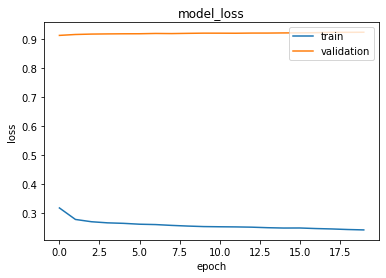

In [45]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()